# Week 5
# 28 February, 2023

### 1. Write the python code to perform the following (for two dataset each, with minimum 20/100+ fields each);

#### Simple Linear Regression

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
# Generate some random data
np.random.seed(0)
X = np.random.rand(200)
Y = np.random.randint(5) * X + 1 + np.random.rand(200)
X_train,Y_train,X_test,Y_test=train_test_split(X,Y,test_size=0.2)

In [5]:
# Building the model
m = 0
c = 0
L = 0.1  # The learning Rate
iters = 100000 # The number of iterations to perform gradient descent
n = float(len(X_train)) # Number of elements in X
# Performing Gradient Descent 
for i in range(iters): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y- Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

1.8850445441953492 1.56783860778547


1.885044544195348 2.567838607785471


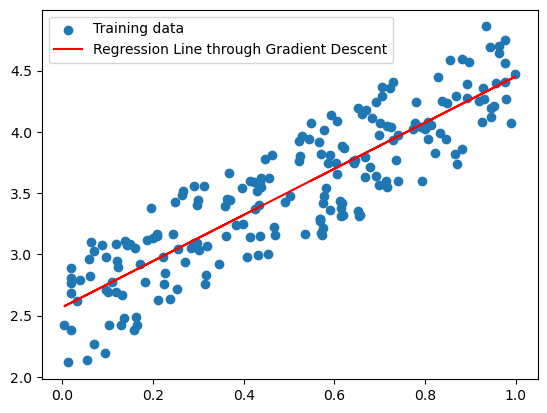

In [6]:
np.random.seed(0)
X = np.random.rand(200)
Y = np.random.randint(5) * X + 2 + np.random.rand(200)
X_train,Y_train,X_test,Y_test=train_test_split(X,Y,test_size=0.3)
# Building the model
m = 0
c = 0
L = 0.1  # The learning Rate
iters = 100000 # The number of iterations to perform gradient descent
n = float(len(X_train)) # Number of elements in X
# Performing Gradient Descent 
for i in range(iters): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y- Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)
plt.scatter(X,Y,label="Training data")
plt.plot(X,m*X + c,color="red",label="Regression Line through Gradient Descent")
plt.legend()
plt.show()

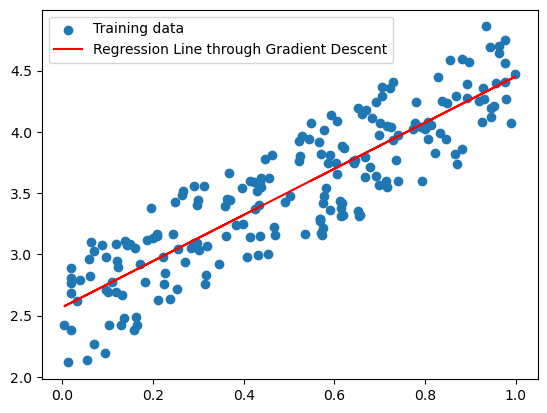

In [7]:
plt.scatter(X,Y,label="Training data")
plt.plot(X,m*X + c,color="red",label="Regression Line through Gradient Descent")
plt.legend()
plt.show()

#### Logistic Regression 

In [1]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logistic_regression(X, y, alpha, iterations):
    m, n = X.shape
    theta = np.zeros(n)
    for _ in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient
    return theta

# Example usage
X = np.array([[1, 2], [1, 3], [1, 4]])
y = np.array([0, 0, 1])
alpha = 0.1
iterations = 1000

theta = logistic_regression(X, y, alpha, iterations)
print(theta)

[-5.95522123  1.72393541]


In [9]:
def predict(X, theta):
    h = sigmoid(np.dot(X, theta))
    return (h >= 0.5).astype(int)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Example usage
X = np.array([[1, 2], [1, 3], [1, 4]])
y = np.array([0, 0, 1])
alpha = 0.1
iterations = 1000

theta = logistic_regression(X, y, alpha, iterations)
y_pred = predict(X, theta)
acc = accuracy(y, y_pred)
print(f'Accuracy: {acc:.2f}')

Accuracy: 1.00


In [10]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(x, y, theta):
    m = len(y)
    h = sigmoid(x.dot(theta))
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def grad(x, y, theta, alpha, num_iter):
    m = len(y)
    i_history = np.zeros([num_iter, 1])
    for iter in range(num_iter):
        h = sigmoid(x.dot(theta))
        theta = theta - (alpha / m) * (x.T.dot(h - y))
        i_history[iter] = compute_cost(x, y, theta)
    return theta, i_history

x = np.array([[1, 2], [2, 3], [3, 4],[4,5]])
y = np.array([[0], [0], [1], [1]])
x_norm = ((x - np.mean(x, axis=0)) / np.std(x, axis=0))
m = len(y)
x_norm = np.hstack((np.ones((m, 1)), x_norm))
n = x_norm.shape[1]
theta = np.zeros((n, 1))
alpha = 0.01
num_iter = 1000
theta, i_history = grad(x_norm, y, theta, alpha, num_iter)
print('Theta:', theta)
print('Final cost:', i_history[-1])

x = np.array([[4, 5], [6, 7], [8, 9],[10,11]])
y = np.array([[1], [1], [0], [0]])
x_norm = ((x - np.mean(x, axis=0)) / np.std(x, axis=0))
m = len(y)
x_norm = np.hstack((np.ones((m, 1)), x_norm))
n = x_norm.shape[1]
theta = np.zeros((n, 1))
alpha = 0.01
num_iter = 1000
theta, i_history = grad(x_norm, y, theta, alpha, num_iter)
print('Theta:', theta)
print('Final cost:', i_history[-1])

Theta: [[-3.19189120e-18]
 [ 1.41746392e+00]
 [ 1.41746392e+00]]
Final cost: [0.13501854]
Theta: [[-4.52762827e-18]
 [-1.41746392e+00]
 [-1.41746392e+00]]
Final cost: [0.13501854]
